Load data

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images_temp, train_labels_temp), (test_images_temp, test_labels_temp) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images_temp, test_images_temp = train_images_temp / 255.0, test_images_temp / 255.0

# Print dataset shapes
print("Train images shape:", train_images_temp.shape)
print("Train labels shape:", train_labels_temp.shape)
print("Test images shape:", test_images_temp.shape)
print("Test labels shape:", test_labels_temp.shape)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


merge all data to a common dataset

In [26]:
import numpy as np

images = np.concatenate((train_images_temp,test_images_temp),axis=0)
lables = np.concatenate((train_labels_temp,test_labels_temp),axis=0)

num_train_images = int(images.shape[0]*0.6)
num_validate_images = int(images.shape[0]*0.2)
num_test_images = int(images.shape[0]*0.2)

train_images,validate_images,test_images = np.split(images,[num_train_images,num_validate_images+num_test_images])
train_labels,validate_labels,test_labels = np.split(lables,[num_train_images,num_test_images+num_validate_images])



Build the model

In [7]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout
x1,m1=32,3
x2,m2=32,3
x3=64
dropout_rate=0.2
model = Sequential([
    Conv2D(x1, (m1,m1), activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(x2, (m2,m2), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(x3, activation = 'relu'),
    Dropout(rate=dropout_rate),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train the model

In [9]:
model.fit(train_images, train_labels, validation_data=(validate_images, validate_labels), epochs=20, batch_size=32)

Epoch 1/20
1125/1125 [==============================] - 21s 18ms/step - loss: 1.6650 - accuracy: 0.3911
Epoch 2/20
1125/1125 [==============================] - 19s 17ms/step - loss: 1.3480 - accuracy: 0.5164
Epoch 3/20
1125/1125 [==============================] - 20s 18ms/step - loss: 1.2118 - accuracy: 0.5665
Epoch 4/20
1125/1125 [==============================] - 20s 18ms/step - loss: 1.1358 - accuracy: 0.5973
Epoch 5/20
1125/1125 [==============================] - 20s 18ms/step - loss: 1.0734 - accuracy: 0.6177
Epoch 6/20
1125/1125 [==============================] - 20s 18ms/step - loss: 1.0261 - accuracy: 0.6386
Epoch 7/20
1125/1125 [==============================] - 20s 18ms/step - loss: 0.9806 - accuracy: 0.6543
Epoch 8/20
1125/1125 [==============================] - 21s 18ms/step - loss: 0.9482 - accuracy: 0.6608
Epoch 9/20
1125/1125 [==============================] - 21s 19ms/step - loss: 0.9188 - accuracy: 0.6742
Epoch 10/20
1125/1125 [==============================] - 19s 17m

Test the model

In [16]:
# predictions = model.predict(test_images[10])
# print(predictions)

input_data = np.expand_dims(test_images[100], axis=0)

# Now, input_data has the shape (1, 32, 32, 3), creating a batch of one image

# Make predictions
predictions = model.predict(input_data)
print(predictions,test_labels[100])

1/1 [==============================] - 0s 370ms/step
[[4.36509581e-05 4.72345018e-05 5.51747996e-03 7.00812280e-01
  1.07856154e-01 9.50483605e-02 8.88284445e-02 1.83000171e-03
  2.01818011e-06 1.43876678e-05]] [3]


Evaluate the model

1125/1125 [==============================] - 6s 5ms/step - loss: 0.8414 - accuracy: 0.7193
Test Accuracy: 0.7192777991294861
1125/1125 [==============================] - 5s 5ms/step


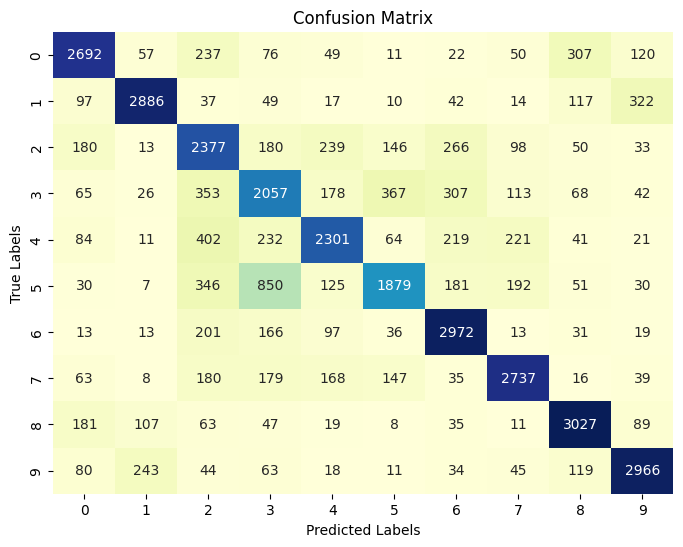

Classification Report:
               precision    recall  f1-score   support

    Airplane       0.77      0.74      0.76      3621
  Automobile       0.86      0.80      0.83      3591
        Bird       0.56      0.66      0.61      3582
         Cat       0.53      0.58      0.55      3576
        Deer       0.72      0.64      0.68      3596
         Dog       0.70      0.51      0.59      3691
        Frog       0.72      0.83      0.77      3561
       Horse       0.78      0.77      0.77      3572
        Ship       0.79      0.84      0.82      3587
       Truck       0.81      0.82      0.81      3623

    accuracy                           0.72     36000
   macro avg       0.72      0.72      0.72     36000
weighted avg       0.72      0.72      0.72     36000



In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test dataset
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(test_labels, test_predictions_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate and print a classification report
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
class_report = classification_report(test_labels, test_predictions_classes, target_names=class_labels)
print("Classification Report:\n", class_report)
